In [1]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
symbol = 'BTC-USD'
period='10y'
ticker = yf.Ticker(symbol)
df = ticker.history(period)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [3]:
df = df.reset_index()
df = df.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis = 1)

df['Date'] = pd.to_datetime(df['Date']) #convert to datetime
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d') #format as YYYY-MM-DD

df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7cxxk782/vc3zytwj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7cxxk782/6zdtvcir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73539', 'data', 'file=/tmp/tmp7cxxk782/vc3zytwj.json', 'init=/tmp/tmp7cxxk782/6zdtvcir.json', 'output', 'file=/tmp/tmp7cxxk782/prophet_modelhjo3f4l0/prophet_model-20231219144604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3741,2024-12-14
3742,2024-12-15
3743,2024-12-16
3744,2024-12-17
3745,2024-12-18


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3741,2024-12-14,20631.332603,7165.373644,39311.351334
3742,2024-12-15,20548.390488,7731.949835,37927.323510
3743,2024-12-16,20479.470302,7959.162088,36976.540833
3744,2024-12-17,20403.865498,7362.617516,37903.458279
3745,2024-12-18,20331.706922,7267.591430,37715.336834


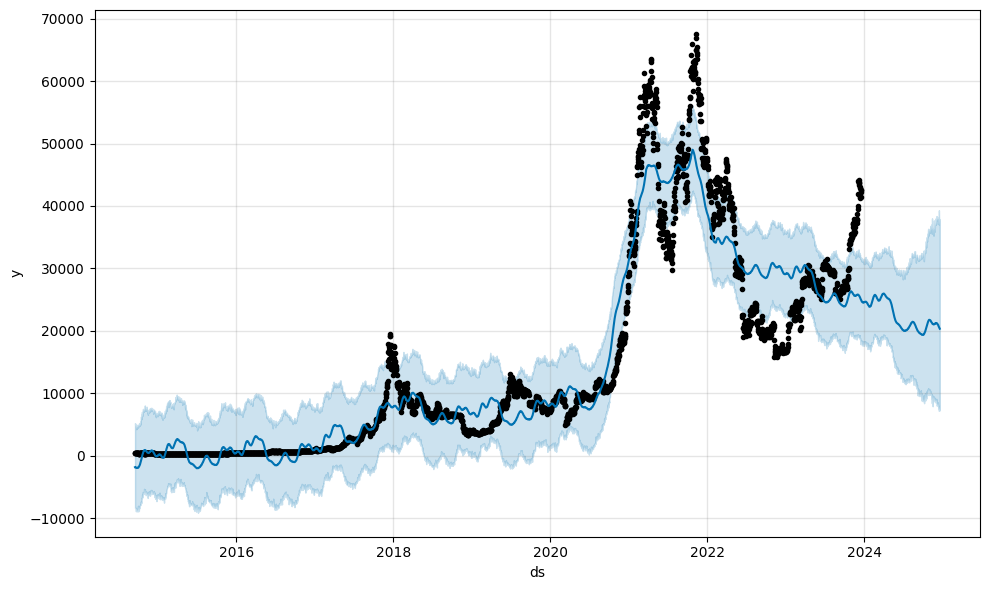

In [7]:
fig1 = m.plot(forecast)

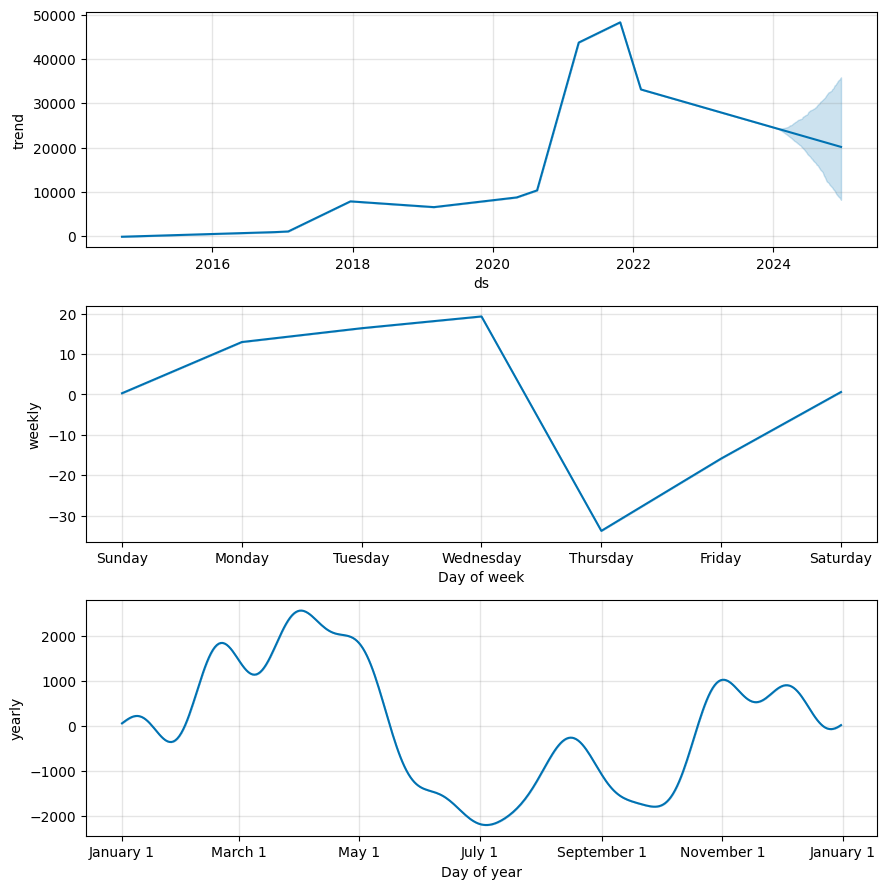

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)